# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Tingting Ma

    Jiani Gao

    Jinyan Lyu

    Tianhao Guo

    Mo Cheng

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [2]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [104]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = 'review_polarity/txt_sentoken'
categories = ['pos', 'neg']
dataset = load_files(movie_reviews_data_folder, categories=categories, shuffle=False, encoding='utf-8')
print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.00
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.01
             precision    recall  f1-score   support

        neg       0.87      0.82      0.85       256
        pos       0.82      0.87      0.85       244

avg / total       0.85      0.85      0.85       500

[[210  46]
 [ 31 213]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

Define the term frequency–inverse document frequency (TF-IDF) statistic:

TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document, but is often offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. 

TF, short for term frequency, is the number of times a term occurs in a document. In the case of the term frequency tf(t,d), the simplest choice is to use the raw count of a term in a document.

IDF: an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely. 

Then tf–idf is calculated as:
tfidf(t, d, D) = tf(t,d) * idf(t, D) = (Number of times term t appears in a document d) / (Total number of terms in the documentd) * log_e(total number of documents in the corpus / Number of documents with term t in it).

max_df: This parameter is float in range [0.0, 1.0] or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

min_df: This parameter is float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

ngram_range : This parameter is a tuple (min_n, max_n)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.


In [2]:
# Run the TfidVectorizer class on the training data above (docs_train).
vect = TfidfVectorizer()
X_train_tf = vect.fit_transform(docs_train)
X_train_tf.shape

(1500, 35437)

In [3]:
# Explore the min_df and max_df parameters of TfidVectorizer. 

# First, we analyze the min_df parameter of TfidVectorizer by using different min_df values on the training data.
import numpy as np
import matplotlib.pylab as py

[35320, 35320, 21026, 15974, 13113, 11231, 9834, 8813, 7930, 7277, 6734, 6281, 5849, 5493, 5137, 4842, 4601, 4380, 4170, 3986, 3819, 3667, 3518, 3388, 3262, 3151, 3040, 2940, 2856, 2783, 2695, 2611, 2533, 2451, 2377, 2329, 2267, 2214, 2154, 2098, 2050, 2009, 1965, 1942, 1898, 1858, 1822, 1786, 1752, 1723, 1687, 1657, 1623, 1599, 1567, 1541, 1499, 1482, 1460, 1445, 1420, 1397, 1366, 1345, 1325, 1296, 1285, 1266, 1245, 1231, 1207, 1188, 1171, 1154, 1138, 1124, 1108, 1093, 1076, 1072, 1057, 1044, 1031, 1020, 1010, 995, 989, 975, 968, 957, 947, 932, 927, 915, 907, 898, 893, 883, 876, 862]


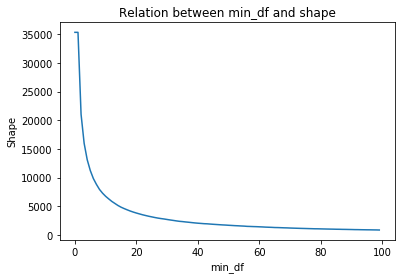

In [7]:
result_for_min_df = []
for i in range(0, 100):
    vect = TfidfVectorizer(min_df = i)
    X_train_tf = vect.fit_transform(docs_train)
    result_for_min_df.append(X_train_tf.shape[1])
print(result_for_min_df)

ar = np.arange(len(result_for_min_df))
py.plot(ar, result_for_min_df)
py.xlabel("min_df")
py.ylabel("Shape")
py.title("Relation between min_df and shape")
py.show()

[30719, 32709, 33498, 33923, 34212, 34388, 34501, 34613, 34708, 34779, 34837, 34875, 34907, 34933, 34964, 34991, 35015, 35034, 35046, 35059, 35067, 35083, 35091, 35099, 35114, 35118, 35129, 35133, 35142, 35152, 35160, 35171, 35174, 35183, 35188, 35193, 35197, 35203, 35206, 35209, 35214, 35219, 35220, 35224, 35227, 35230, 35231, 35238, 35241, 35243, 35243, 35245, 35248, 35253, 35258, 35260, 35263, 35263, 35264, 35265, 35266, 35266, 35267, 35267, 35272, 35273, 35274, 35276, 35278, 35279, 35279, 35279, 35281, 35283, 35288, 35289, 35289, 35291, 35291, 35291, 35294, 35294, 35294, 35296, 35296, 35298, 35298, 35301, 35303, 35306, 35306, 35306, 35306, 35307, 35308, 35310, 35311, 35313, 35314, 35320]


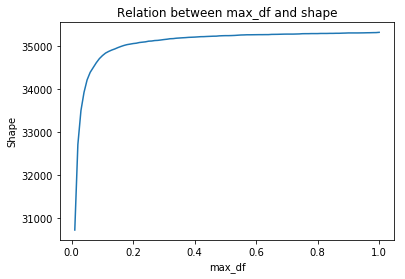

In [13]:
# Then we analyze the max_df parameter of TfidVectorizer by using different max_df values on the training data.
result_for_max_df = []
x_label = np.linspace(0.01, 1.0, 100)
for i in x_label:
    vect = TfidfVectorizer(max_df = i)
    X_train_tf = vect.fit_transform(docs_train)
    result_for_max_df.append(X_train_tf.shape[1])
print(result_for_max_df)

py.plot(x_label, result_for_max_df)
py.xlabel("max_df")
py.ylabel("Shape")
py.title("Relation between max_df and shape")
py.show()

In [3]:
# Explore the ngram_range parameter of TfidVectorizer. How does it change the features you get?
z_list = []
ngram_range_value = [(1,1),(2,2),(3,3),(4,4),(5,5),(1,2),(2,3),(3,4),(4,5),(1,3),(2,4),(3,5),(1,4),(2,5),(1,5)]
for tuple in ngram_range_value: 
    vect = TfidfVectorizer(ngram_range = tuple)
    X_train_tf = vect.fit_transform(docs_train)
    z_list.append(X_train_tf.shape[1])
    print('%s: shape is %s;' % (tuple, X_train_tf.shape[1]))

(1, 1): shape is 35443;
(2, 2): shape is 400307;
(3, 3): shape is 763139;
(4, 4): shape is 895933;
(5, 5): shape is 925941;
(1, 2): shape is 435750;
(2, 3): shape is 1163446;
(3, 4): shape is 1659072;
(4, 5): shape is 1821874;
(1, 3): shape is 1198889;
(2, 4): shape is 2059379;
(3, 5): shape is 2585013;
(1, 4): shape is 2094822;
(2, 5): shape is 2985320;
(1, 5): shape is 3020763;


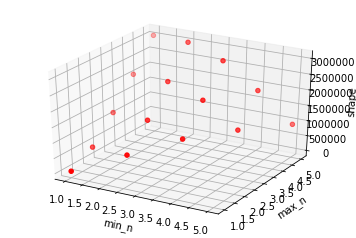

In [6]:
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D 

x_list = [1,2,3,4,5,1,2,3,4,1,2,3,1,2,1]
y_list = [1,2,3,4,5,2,3,4,5,3,4,5,4,5,5]
ax = plt.figure().add_subplot(111, projection = '3d')  

ax.scatter(x_list, y_list, z_list, c = 'r') 
 
ax.set_xlabel('min_n')  
ax.set_ylabel('max_n')  
ax.set_zlabel('shape')  
 
plt.show()  

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [2]:
# "fit" your TfidfVectorizer using docs_train
vect = TfidfVectorizer(min_df = 3, max_df = 0.85, ngram_range = (1, 3))
# Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
X_train_tf = vect.fit_transform(docs_train)
# Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
X_test_tf = vect.transform(docs_test)

print(X_train_tf.shape)
print(X_test_tf.shape)


(1500, 88686)
(500, 88686)


In [7]:
# LinearSVC
# Don't run, takes 20min+
pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', LinearSVC()),
    ])
parameters = {'vect__ngram_range': [(1,1),(2,2),(1,2),(1,3)],
              'vect__max_df': [0.5, 0.75, 1.0],
              'vect__min_df': [1,10,20,30],
              'clf__C': [1, 500, 1000]
}
gs_clf = GridSearchCV(pipeline, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(docs_train, y_train)

n_candidates = len(gs_clf.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
            % (gs_clf.cv_results_['params'][i],
               gs_clf.cv_results_['mean_test_score'][i],
               gs_clf.cv_results_['std_test_score'][i]))

0 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (2, 2)}; mean - 0.82; std - 0.01
2 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}; mean - 0.83; std - 0.01
3 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}; mean - 0.83; std - 0.01
4 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.00
5 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (2, 2)}; mean - 0.80; std - 0.01
6 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.00
7 params - {'clf__C': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (1, 3)}; mean - 0.86; std - 0.00
8 params - {'clf__C': 1, 'vect__max_df': 0.5

In [8]:
y_predicted = gs_clf.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted,
                    target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)


             precision    recall  f1-score   support

        neg       0.89      0.89      0.89       266
        pos       0.88      0.88      0.88       234

avg / total       0.88      0.88      0.88       500

[[237  29]
 [ 29 205]]


In [9]:
import pandas as pd
from pandas import Series, DataFrame
Frame = DataFrame(gs_clf.cv_results_)
Frame.to_csv('LineSVC_gs_clf')

In [10]:
# KNeighborsClassifier
# Don't run, takes 20min+
from sklearn.neighbors import KNeighborsClassifier as KNC
pipeline_KNC = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', KNC()),
])
parameters_KNC = {'vect__ngram_range': [(1,1),(2,2),(1,2),(1,3)],
              'vect__max_df': [0.5, 0.75, 1.0],
              'vect__min_df': [1,10,20,30],
              'clf__n_neighbors': [1,10,20]
}
gs_clf_KNC = GridSearchCV(pipeline_KNC, parameters_KNC, n_jobs=-1)
gs_clf_KNC = gs_clf_KNC.fit(docs_train, y_train)

n_candidates_KNC = len(gs_clf_KNC.cv_results_['params'])
for i in range(n_candidates_KNC):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
            % (gs_clf_KNC.cv_results_['params'][i],
               gs_clf_KNC.cv_results_['mean_test_score'][i],
               gs_clf_KNC.cv_results_['std_test_score'][i]))

0 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}; mean - 0.64; std - 0.01
1 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (2, 2)}; mean - 0.65; std - 0.00
2 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}; mean - 0.64; std - 0.02
3 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}; mean - 0.65; std - 0.01
4 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (1, 1)}; mean - 0.65; std - 0.01
5 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (2, 2)}; mean - 0.61; std - 0.02
6 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range': (1, 2)}; mean - 0.65; std - 0.01
7 params - {'clf__n_neighbors': 1, 'vect__max_df': 0.5, 'vect__min_df': 10, 'vect__ngram_range

In [11]:
y_predicted_KNC = gs_clf_KNC.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted_KNC,
                    target_names=dataset.target_names))
cm_KNC = metrics.confusion_matrix(y_test, y_predicted_KNC)
print(cm_KNC)


             precision    recall  f1-score   support

        neg       0.80      0.64      0.71       266
        pos       0.67      0.82      0.73       234

avg / total       0.74      0.72      0.72       500

[[170  96]
 [ 43 191]]


In [12]:
import pandas as pd
from pandas import Series, DataFrame
Frame = DataFrame(gs_clf_KNC.cv_results_)
Frame.to_csv('KNC_gs_clf')

In [16]:
# RandomForestClassifier
# Don't run, takes 30min+
from sklearn.ensemble import RandomForestClassifier
pipeline_rnd = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', RandomForestClassifier()),
])
parameters_rnd = {'vect__ngram_range': [(1,1),(2,2),(1,2),(1,3)],
              'vect__max_df': [0.25, 0.5, 0.75, 1.0],
              'vect__min_df': [1,10,20,30],
              'clf__n_estimators': [8, 16, 32, 64]
}
gs_clf_rnd = GridSearchCV(pipeline_rnd, parameters_rnd, n_jobs=-1)
gs_clf_rnd.fit(docs_train, y_train)

n_candidates_rnd = len(gs_clf_rnd.cv_results_['params'])
for i in range(n_candidates_rnd):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
            % (gs_clf_rnd.cv_results_['params'][i],
               gs_clf_rnd.cv_results_['mean_test_score'][i],
               gs_clf_rnd.cv_results_['std_test_score'][i]))

0 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}; mean - 0.64; std - 0.03
1 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 1, 'vect__ngram_range': (2, 2)}; mean - 0.59; std - 0.01
2 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}; mean - 0.63; std - 0.02
3 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}; mean - 0.63; std - 0.02
4 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 10, 'vect__ngram_range': (1, 1)}; mean - 0.66; std - 0.03
5 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 10, 'vect__ngram_range': (2, 2)}; mean - 0.62; std - 0.01
6 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 10, 'vect__ngram_range': (1, 2)}; mean - 0.67; std - 0.01
7 params - {'clf__n_estimators': 8, 'vect__max_df': 0.25, 'vect__min_df': 10, 'v

In [18]:
y_predicted_rnd = gs_clf_rnd.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted_rnd,
                    target_names=dataset.target_names))
cm_rnd = metrics.confusion_matrix(y_test, y_predicted_rnd)
print(cm_rnd)


             precision    recall  f1-score   support

        neg       0.72      0.88      0.79       251
        pos       0.84      0.66      0.74       249

avg / total       0.78      0.77      0.77       500

[[220  31]
 [ 84 165]]


In [20]:
import pandas as pd
from pandas import Series, DataFrame
Frame = DataFrame(gs_clf_rnd.cv_results_)
Frame.to_csv('rnd_gs_clf')

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

In [2]:
# For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
from sklearn.neighbors import KNeighborsClassifier as KNC
pipeline_KNC = Pipeline([
        ('vect', TfidfVectorizer(min_df = 1, max_df = 0.5, ngram_range = (1, 2))),
        ('clf', KNC(n_neighbors = 20))
])
KNC_clf = pipeline_KNC.fit(docs_train, y_train)
predicted = KNC_clf.predict(docs_test)
index = 0
for i in range(len(predicted)):
    if predicted[i] != y_test[i]:
        index += 1
        print("Bad example index: %d" %i)
        print("The actural y should be: %d" %y_test[i])
        print("The predicted y: %d" %predicted[i])
        print(docs_test[i])
    if index >= 2:
        break


Bad example index: 3
The actural y should be: 0
The predicted y: 1
b'topless women talk about their lives falls into that category that i mentioned in the devil\'s advocate : movies that have a brilliant beginning but don\'t know how to end . \nit begins by introducing us to a selection of characters who all know each other . \nthere is liz , who oversleeps and so is running late for her appointment , prue who is getting married , geoff , liz\'s boyfriend , neil , her previous boyfriend , ant who has written a screenplay . \nfor the first hour , we get to know these people through everyday activities , as they talk on the phone , go out to dinner , hang clothes on the line . \nthe interactions seem so truthful and guileless that it is almost as if the film-makers hid cameras around the place and filmed these people unbeknownst to them . \nat times , the events border on the ridiculous , like the screening of the film , but they still seem in keeping with the characters and their lives 

Conjecture on why the classifier made a mistake for this prediction:

After analyzing the first bad examples, which is negative but predicted to be positive, we found that although this is a negative review, the words used in this context are kink of vague. The reviewer thought the movie is not too bad so he/she didn't use too much negative words to describe. And the review mainly described the content of the movie and also made some positive assessment of the good part. Thus, the classifier was "confused" and made a mistake.

The second review is positive but predicted as a negative one. After reading this review, we found that this reviewer used too many negative words such as "not", "didn't" and "wasn't" when describing the content of the movie and also emphasized a lot that he/she wasn't a fun of this kind of movie before watching this one. Since the classifier could not tell the usage of these negative words, it made the mistake. 



*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [156]:
# let's try professor's method 1: the length of the review versus the number of features
import matplotlib.pyplot as plt

x_all, x_test, y_all, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0, random_state=None)

vect = TfidfVectorizer(min_df = 3, max_df = 0.85, ngram_range = (1, 3))
X_train_tf = vect.fit_transform(x_all)
length, feature = [], []
for i in range(len(x_all)):
    length.append(len(x_all[i]))
    feature.append(X_train_tf[i].getnnz())

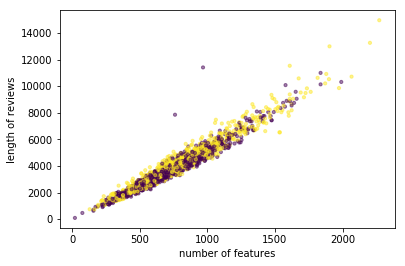

In [157]:
ax = plt.figure().add_subplot(111)
ax.scatter(feature, length, c=y_all, s=10, alpha=0.5)
ax.set_xlabel('number of features')
ax.set_ylabel('length of reviews')
plt.show()

In [158]:
# let's try professor's method 2: PCA

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
%matplotlib inline

In [159]:
dataset = load_files(movie_reviews_data_folder, shuffle=False, encoding='utf-8')
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0, random_state=None)

vect = TfidfVectorizer(min_df=3, max_df=0.85, ngram_range=(1, 3), decode_error='ignore')
x_train_tf = vect.fit_transform(x_train)
pca = TruncatedSVD(n_components=2)
fea_train = pca.fit_transform(x_train_tf)

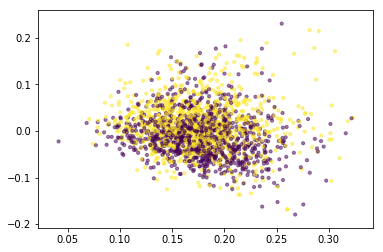

In [160]:
plt.figure()
plt.scatter(fea_train[:,0], fea_train[:,1], c=y_train, s=10, alpha=0.5)

In [161]:
# try selectKBest, then PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_new = SelectKBest(f_classif, k=500).fit_transform(x_train_tf, y_train)
print(x_new.shape)

(2000, 500)


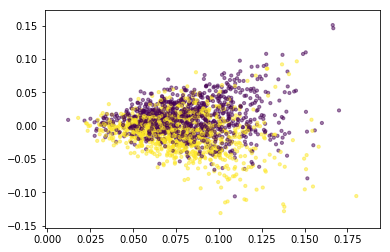

In [162]:
new_fea_train = pca.fit_transform(x_new)
plt.figure()
plt.scatter(new_fea_train[:,0], new_fea_train[:,1], c=y_train, s=10, alpha=0.5)

In [163]:
#use kmeans to compute centroids, then compute distance
from sklearn.cluster import KMeans

kmeans_tf = KMeans(n_clusters=2).fit(x_train_tf)
centroid_0 = kmeans_tf.cluster_centers_[0]
centroid_1 = kmeans_tf.cluster_centers_[1]

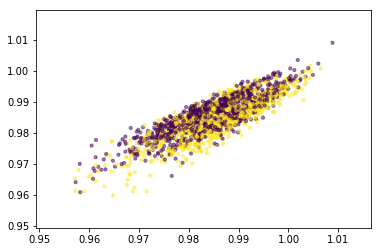

In [164]:
dist_c0, dist_c1 = [], []

for i in x_train_tf:
    dist_c0.append(np.linalg.norm(i-centroid_0))
    dist_c1.append(np.linalg.norm(i-centroid_1))
plt.figure()
plt.scatter(dist_c0, dist_c1, c=y_train, s=10, alpha=0.5)

In [165]:
#first selectBestK, then use kmeans to compute centroids, then compute distance
from sklearn.cluster import KMeans

# vect = TfidfVectorizer(min_df=10, max_df=0.8, ngram_range=(1, 2), decode_error='ignore')
# x_train_tf = vect.fit_transform(x_train)

x_new = SelectKBest(f_classif, k=20).fit_transform(x_train_tf, y_train)
kmeans_tf = KMeans(n_clusters=2).fit(x_new)
new_centroid_0 = kmeans_tf.cluster_centers_[0]
new_centroid_1 = kmeans_tf.cluster_centers_[1]
print(new_centroid_0)
print(new_centroid_1)

[ 0.00101747  0.00354026  0.00165515  0.01265517  0.00645675  0.00105086
  0.00988146  0.00134363  0.00436038  0.00594493  0.00095677  0.00117049
  0.00126376  0.00120928  0.00111907  0.00087595  0.0013706   0.00095837
  0.00370802  0.00128181]
[ 0.00295077  0.02045518  0.00558322  0.02823552  0.00384262  0.00223039
  0.00486192  0.00291712  0.00697855  0.01415344  0.00301387  0.00428676
  0.0061672   0.00739339  0.00710134  0.00617561  0.00301685  0.00255554
  0.01067402  0.00752242]


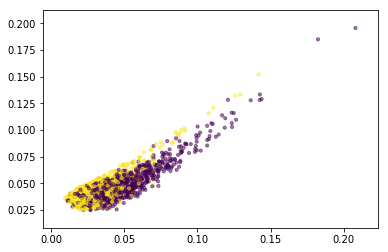

In [166]:
new_dist_c0, new_dist_c1 = [], []

for i in x_new:
    new_dist_c0.append(np.linalg.norm(i-new_centroid_0))
    new_dist_c1.append(np.linalg.norm(i-new_centroid_1))
plt.figure()
plt.scatter(new_dist_c0, new_dist_c1, c=y_train, s=10, alpha=0.5)

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **